In [52]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import pi
import matplotlib.colors as mcolors
from scipy import stats

from csv import reader
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pysankey import sankey

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f

# Get the data
characters = open('star-wars-dataset/characters.csv')
df_characters = pd.read_csv('star-wars-dataset/characters.csv')
planets = open('star-wars-dataset/planets.csv')
df_planets = pd.read_csv('star-wars-dataset/planets.csv')
species = open('star-wars-dataset/species.csv')
df_species = pd.read_csv('star-wars-dataset/species.csv')
starships = open('star-wars-dataset/starships.csv')
df_starships = pd.read_csv('star-wars-dataset/starships.csv')
vehicles = open('star-wars-dataset/vehicles.csv')
df_vehicles = pd.read_csv('star-wars-dataset/vehicles.csv')


sns.set()

In [53]:
df_characters.head(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human
5,Owen Lars,178.0,120,"brown, grey",light,blue,52BBY,male,Tatooine,Human
6,Beru Whitesun lars,165.0,75,brown,light,blue,47BBY,female,Tatooine,Human
7,R5-D4,97.0,32,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
8,Biggs Darklighter,183.0,84,black,light,brown,24BBY,male,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,Human


In [54]:
df_planets.head(10)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
1,Yavin IV,24.0,4818.0,10200.0,"temperate, tropical",1 standard,"jungle, rainforests",8.0,1.000000e+03
2,Hoth,23.0,549.0,7200.0,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100.0,NaN
3,Dagobah,23.0,341.0,8900.0,murky,NaN,"swamp, jungles",8.0,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06
5,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07
6,Naboo,26.0,312.0,12120.0,temperate,1 standard,"grassy hills, swamps, forests, mountains",12.0,4.500000e+09
7,Coruscant,24.0,368.0,12240.0,temperate,1 standard,"cityscape, mountains",NaN,1.000000e+12
8,Kamino,27.0,463.0,19720.0,temperate,1 standard,ocean,100.0,1.000000e+09
9,Geonosis,30.0,256.0,11370.0,"temperate, arid",0.9 standard,"rock, desert, mountain, barren",5.0,1.000000e+11


In [55]:
df_species.head(10)

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,language,homeworld
0,Hutt,gastropod,sentient,300.0,"green, brown, tan",NaN,"yellow, red",1000,Huttese,Nal Hutta
1,Yoda's species,mammal,sentient,66.0,"green, yellow","brown, white","brown, green, yellow",900,Galactic basic,NaN
2,Trandoshan,reptile,sentient,200.0,"brown, green",none,"yellow, orange",NaN,Dosh,Trandosha
3,Mon Calamari,amphibian,sentient,160.0,"red, blue, brown, magenta",none,yellow,NaN,Mon Calamarian,Mon Cala
4,Ewok,mammal,sentient,100.0,brown,"white, brown, black","orange, brown",NaN,Ewokese,Endor
5,Sullustan,mammal,sentient,180.0,pale,none,black,NaN,Sullutese,Sullust
6,Neimodian,NaN,sentient,180.0,"grey, green",none,"red, pink",NaN,Neimoidia,Cato Neimoidia
7,Gungan,amphibian,sentient,190.0,"brown, green",none,orange,NaN,Gungan basic,Naboo
8,Toydarian,mammal,sentient,120.0,"blue, green, grey",none,yellow,91,Toydarian,Toydaria
9,Dug,mammal,sentient,100.0,"brown, purple, grey, red",none,"yellow, blue",NaN,Dugese,Malastare


In [56]:
df_starships.head(10)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class
0,Executor,Executor-class star dreadnought,"Kuat Drive Yards, Fondor Shipyards",1.143350e+09,19000,NaN,279144.0,38000.0,2.500000e+08,6 years,2.0,40.0,Star dreadnought
1,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",2.400000e+05,38,1000,5.0,75.0,1.800000e+05,1 month,1.0,70.0,landing craft
2,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1.000000e+12,120000,NaN,342953.0,843342.0,1.000000e+12,3 years,4.0,10.0,Deep Space Mobile Battlestation
3,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,1.000000e+05,34.37,1050,4.0,6.0,1.000000e+05,2 months,0.5,75.0,Light freighter
4,Y-wing,BTL Y-wing,Koensayr Manufacturing,1.349990e+05,14,1000km,2.0,0.0,1.100000e+02,1 week,1.0,80.0,assault starfighter
5,X-wing,T-65 X-wing,Incom Corporation,1.499990e+05,12.5,1050,1.0,0.0,1.100000e+02,1 week,1.0,100.0,Starfighter
6,TIE Advanced x1,Twin Ion Engine Advanced x1,Sienar Fleet Systems,NaN,9.2,1200,1.0,0.0,1.500000e+02,5 days,1.0,105.0,Starfighter
7,Slave 1,Firespray-31-class patrol and attack,Kuat Systems Engineering,NaN,21.5,1000,1.0,6.0,7.000000e+04,1 month,3.0,70.0,Patrol craft
8,Imperial shuttle,Lambda-class T-4a shuttle,Sienar Fleet Systems,2.400000e+05,20,850,6.0,20.0,8.000000e+04,2 months,1.0,50.0,Armed government transport
9,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,Kuat Drive Yards,8.500000e+06,300,800,854.0,75.0,6.000000e+06,2 years,2.0,40.0,Escort ship


In [57]:
df_vehicles.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000.0,36.8,30.0,46,30.0,50000,2 months,wheeled
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500.0,10.4,1200.0,1,1.0,50,0,repulsorcraft
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550.0,3.4,250.0,1,1.0,5,NaN,repulsorcraft
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,NaN,6.4,1200.0,1,0.0,65,2 days,starfighter
4,Snowspeeder,t-47 airspeeder,Incom corporation,NaN,4.5,650.0,2,0.0,10,none,airspeeder


In [58]:
df_species['language'].unique()

array(['Huttese', 'Galactic basic', 'Dosh', 'Mon Calamarian', 'Ewokese',
       'Sullutese', 'Neimoidia', 'Gungan basic', 'Toydarian', 'Dugese',
       "Twi'leki", 'Aleena', 'vulpterish', 'Xextese', 'Tundan', 'Cerean',
       'Nautila', 'Zabraki', nan, 'Iktotchese', 'Quermian', 'Kel Dor',
       'Chagria', 'Geonosian', 'Mirialan', 'Clawdite', 'besalisk',
       'Kaminoan', 'Skakoan', 'Muun', 'Togruti', 'Kaleesh', 'Utapese',
       'Shyriiwook', 'Galactic Basic'], dtype=object)

## Similarity to Earth analysis

In [59]:
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
1,Yavin IV,24.0,4818.0,10200.0,"temperate, tropical",1 standard,"jungle, rainforests",8.0,1.000000e+03
2,Hoth,23.0,549.0,7200.0,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100.0,NaN
3,Dagobah,23.0,341.0,8900.0,murky,NaN,"swamp, jungles",8.0,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06


In [60]:
# Sort in alphabetical order by the name of the planets
df_planets = df_planets.sort_values('name', ascending=True)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
36,Aleen Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06
24,Bestine IV,26.0,680.0,6400.0,temperate,NaN,"rocky islands, oceans",98.0,6.200000e+07
16,Cato Neimoidia,25.0,278.0,0.0,"temperate, moist",1 standard,"mountains, fields, forests, rock arches",NaN,1.000000e+07


In [61]:
# Reset index of the data frame
df_planets = df_planets.reset_index(drop=True)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
1,Aleen Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06
3,Bestine IV,26.0,680.0,6400.0,temperate,NaN,"rocky islands, oceans",98.0,6.200000e+07
4,Cato Neimoidia,25.0,278.0,0.0,"temperate, moist",1 standard,"mountains, fields, forests, rock arches",NaN,1.000000e+07


In [62]:
df_planets['name'].unique()

array(['Alderaan', 'Aleen Minor', 'Bespin', 'Bestine IV',
       'Cato Neimoidia', 'Cerea', 'Champala', 'Chandrila', 'Concord Dawn',
       'Corellia', 'Coruscant', 'Dagobah', 'Dantooine', 'Dathomir',
       'Dorin', 'Endor', 'Eriadu', 'Felucia', 'Geonosis', 'Glee Anselm',
       'Haruun Kal', 'Hoth', 'Iktotch', 'Iridonia', 'Jakku', 'Kalee',
       'Kamino', 'Kashyyyk', 'Malastare', 'Mirial', 'Mon Cala',
       'Mustafar', 'Muunilinst', 'Mygeeto', 'Naboo', 'Nal Hutta', 'Ojom',
       'Ord Mantell', 'Polis Massa', 'Quermia', 'Rodia', 'Ryloth',
       'Saleucami', 'Serenno', 'Shili', 'Skako', 'Socorro', 'Stewjon',
       'Sullust', 'Tatooine', 'Tholoth', 'Toydaria', 'Trandosha',
       'Troiken', 'Tund', 'Umbara', 'Utapau', 'Vulpter', 'Yavin IV',
       'Zolan', nan], dtype=object)

In [63]:
df_planets.dropna(inplace=True)

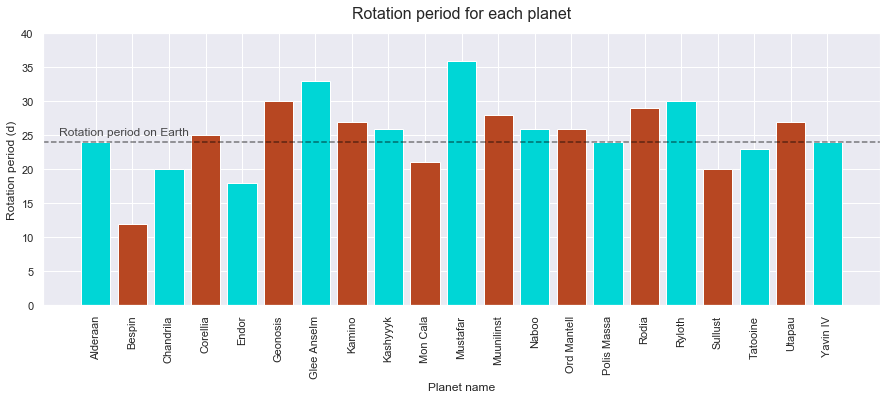

In [64]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['rotation_period'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Rotation period for each planet', fontsize=16, pad=15)
plt.ylabel('Rotation period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 40)
ax.axhline(y=24, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=-1, y=25, s='Rotation period on Earth', alpha=0.7, color='black');

In [66]:
df_planets['rotation_period_diff'] = abs(df_planets['rotation_period'] - 24)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0.0
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12.0
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4.0
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1.0
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6.0


In [67]:
#df_planets['rotation_period_diff'] = df_planets['rotation_period_diff'].apply(np.int64) # This works as well, leaving here for a learning purpose
df_planets['rotation_period_diff'] = df_planets['rotation_period_diff'].astype('int64')
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6


In [68]:
df_planets.dtypes

name                     object
rotation_period         float64
orbital_period          float64
diameter                float64
climate                  object
gravity                  object
terrain                  object
surface_water           float64
population              float64
rotation_period_diff      int64
dtype: object

In [69]:
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6


In [70]:
print(min(df_planets['rotation_period_diff']))

0


In [71]:
12/10

1.2

In [72]:
df_planets.dtypes

name                     object
rotation_period         float64
orbital_period          float64
diameter                float64
climate                  object
gravity                  object
terrain                  object
surface_water           float64
population              float64
rotation_period_diff      int64
dtype: object

In [73]:
print(0.0)
print(1.2*1)
print(1.2*2)
print(1.2*3)
print(1.2*4)
print(1.2*5)
print(1.2*6)
print(1.2*7)
print(1.2*8)
print(1.2*9)
print(1.2*10)

0.0
1.2
2.4
3.5999999999999996
4.8
6.0
7.199999999999999
8.4
9.6
10.799999999999999
12.0


In [74]:
df_planets['rotation_period_diff'].unique()

array([ 0, 12,  4,  1,  6,  9,  3,  2,  5])

In [75]:
df_planets['rotation_period_pkt'] = df_planets['rotation_period_diff'].apply(lambda x: 10 if x in (0,1) else
                                                                       9 if x == 2 else
                                                                       8 if x == 3 else
                                                                       7 if x == 4 else
                                                                       6 if x == 5 else
                                                                       5 if x == 6 else
                                                                       3 if x == 9 else
                                                                       1)

In [76]:
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_pkt
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0,10
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12,1
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4,7
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1,10
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6,5


In [77]:
df_planets['rotation_period_pkt'].unique()

array([10,  1,  7,  5,  3,  8,  9,  6])

In [78]:
print(max(df_planets['orbital_period']))

5110.0


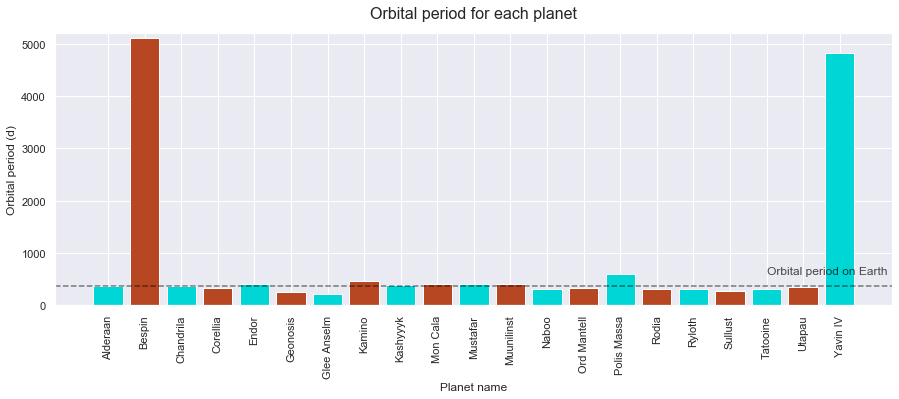

In [79]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['orbital_period'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Orbital period for each planet', fontsize=16, pad=15)
plt.ylabel('Orbital period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 5200)
ax.axhline(y=365, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=600, s='Orbital period on Earth', alpha=0.7, color='black');

In [80]:
df_planets['orbital_period_diff'] = abs(df_planets['orbital_period'] - 365)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_pkt,orbital_period_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0,10,1.0
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12,1,4745.0
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4,7,3.0
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1,10,36.0
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6,5,37.0


In [81]:
df_planets['orbital_period_diff'].unique()

array([1.000e+00, 4.745e+03, 3.000e+00, 3.600e+01, 3.700e+01, 1.090e+02,
       1.590e+02, 9.800e+01, 1.600e+01, 3.300e+01, 4.700e+01, 5.300e+01,
       3.100e+01, 2.250e+02, 6.000e+01, 1.020e+02, 6.100e+01, 1.400e+01,
       4.453e+03])

In [82]:
df_planets.dtypes

name                     object
rotation_period         float64
orbital_period          float64
diameter                float64
climate                  object
gravity                  object
terrain                  object
surface_water           float64
population              float64
rotation_period_diff      int64
rotation_period_pkt       int64
orbital_period_diff     float64
dtype: object

In [83]:
df_planets['orbital_period_pkt'] = df_planets['orbital_period_diff'].apply(lambda x: )

SyntaxError: invalid syntax (<ipython-input-83-cd784c1c9053>, line 1)

In [84]:
print(max(df_planets['diameter']))

118000.0


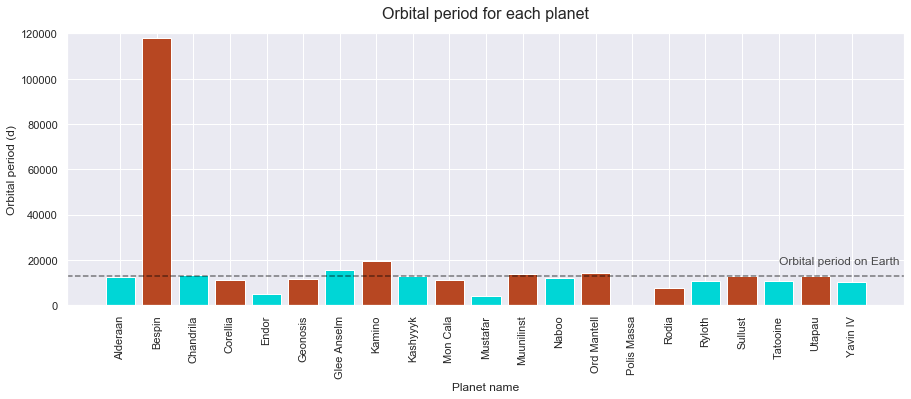

In [85]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['diameter'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Orbital period for each planet', fontsize=16, pad=15)
plt.ylabel('Orbital period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 120000)
ax.axhline(y=12742, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=18000, s='Orbital period on Earth', alpha=0.7, color='black');

In [86]:
df_planets['diameter_diff'] = abs(df_planets['diameter'] - 12742)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_pkt,orbital_period_diff,diameter_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0,10,1.0,242.0
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12,1,4745.0,105258.0
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4,7,3.0,758.0
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1,10,36.0,1742.0
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6,5,37.0,7842.0


In [87]:
df_planets['diameter_diff'].unique()

array([2.42000e+02, 1.05258e+05, 7.58000e+02, 1.74200e+03, 7.84200e+03,
       1.37200e+03, 2.85800e+03, 6.97800e+03, 2.30000e+01, 1.71200e+03,
       8.54200e+03, 1.05800e+03, 6.22000e+02, 1.30800e+03, 1.27420e+04,
       5.19300e+03, 2.14200e+03, 3.80000e+01, 2.27700e+03, 1.58000e+02,
       2.54200e+03])

In [88]:
print(max(df_planets['surface_water']))

100.0


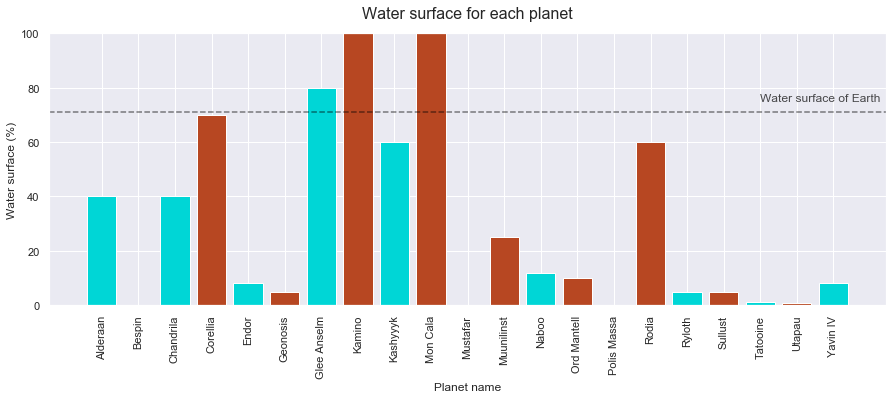

In [89]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['surface_water'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Water surface for each planet', fontsize=16, pad=15)
plt.ylabel('Water surface (%)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 100)
ax.axhline(y=71, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=75, s='Water surface of Earth', alpha=0.7, color='black');

In [90]:
df_planets['surface_water_diff'] = abs(df_planets['surface_water'] - 71)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_pkt,orbital_period_diff,diameter_diff,surface_water_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0,10,1.0,242.0,31.0
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12,1,4745.0,105258.0,71.0
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4,7,3.0,758.0,31.0
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1,10,36.0,1742.0,1.0
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6,5,37.0,7842.0,63.0


In [91]:
df_planets['surface_water_diff'].unique()

array([31. , 71. ,  1. , 63. , 66. ,  9. , 29. , 11. , 46. , 59. , 61. ,
       70. , 70.1])

In [92]:
print(max(df_planets['population']))

100000000000.0


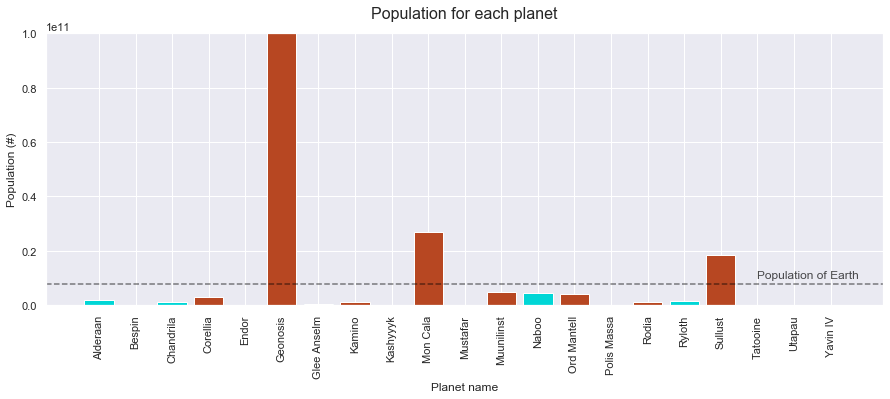

In [93]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['population'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Population for each planet', fontsize=16, pad=15)
plt.ylabel('Population (#)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 100000000000)
ax.axhline(y=7700000000, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=10000000000, s='Population of Earth', alpha=0.7, color='black');

In [94]:
df_planets['population_diff'] = abs(df_planets['population'] - 7700000000)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_pkt,orbital_period_diff,diameter_diff,surface_water_diff,population_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0,10,1.0,242.0,31.0,5.700000e+09
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12,1,4745.0,105258.0,71.0,7.694000e+09
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4,7,3.0,758.0,31.0,6.500000e+09
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1,10,36.0,1742.0,1.0,4.700000e+09
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6,5,37.0,7842.0,63.0,7.670000e+09


In [95]:
df_planets['gravity'].unique()

array(['1 standard', '1.5 (surface), 1 standard (Cloud City)', '1',
       '0.85 standard', '0.9 standard', '0.56 standard'], dtype=object)

In [96]:
df_planets['gravity'] = df_planets['gravity'].apply(lambda x: '1' if '1 standard' == x else
                                                   '1' if '1' == x else
                                                   '1.5' if '1.5 (surface), 1 standard (Cloud City)' == x else
                                                   '0.85' if '0.85 standard' == x else
                                                   '0.9' if '0.9 standard' == x else
                                                   '0.56' if '0.56 standard' == x else
                                                   '0')

In [97]:
df_planets.dtypes

name                     object
rotation_period         float64
orbital_period          float64
diameter                float64
climate                  object
gravity                  object
terrain                  object
surface_water           float64
population              float64
rotation_period_diff      int64
rotation_period_pkt       int64
orbital_period_diff     float64
diameter_diff           float64
surface_water_diff      float64
population_diff         float64
dtype: object

In [98]:
df_planets['gravity'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '1.5'

In [99]:
df_planets.dtypes

name                     object
rotation_period         float64
orbital_period          float64
diameter                float64
climate                  object
gravity                  object
terrain                  object
surface_water           float64
population              float64
rotation_period_diff      int64
rotation_period_pkt       int64
orbital_period_diff     float64
diameter_diff           float64
surface_water_diff      float64
population_diff         float64
dtype: object

In [100]:
df_planets['gravity'].unique

<bound method Series.unique of 0        1
2      1.5
7        1
9        1
15    0.85
18     0.9
19       1
26       1
27       1
30       1
31       1
32       1
34       1
37       1
38    0.56
40       1
41       1
48       1
49       1
56       1
58       1
Name: gravity, dtype: object>

## The most common color of eyes/hair for each rase

In [101]:
# Show the data frame
df_species.head(10)

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,language,homeworld
0,Hutt,gastropod,sentient,300.0,"green, brown, tan",NaN,"yellow, red",1000,Huttese,Nal Hutta
1,Yoda's species,mammal,sentient,66.0,"green, yellow","brown, white","brown, green, yellow",900,Galactic basic,NaN
2,Trandoshan,reptile,sentient,200.0,"brown, green",none,"yellow, orange",NaN,Dosh,Trandosha
3,Mon Calamari,amphibian,sentient,160.0,"red, blue, brown, magenta",none,yellow,NaN,Mon Calamarian,Mon Cala
4,Ewok,mammal,sentient,100.0,brown,"white, brown, black","orange, brown",NaN,Ewokese,Endor
5,Sullustan,mammal,sentient,180.0,pale,none,black,NaN,Sullutese,Sullust
6,Neimodian,NaN,sentient,180.0,"grey, green",none,"red, pink",NaN,Neimoidia,Cato Neimoidia
7,Gungan,amphibian,sentient,190.0,"brown, green",none,orange,NaN,Gungan basic,Naboo
8,Toydarian,mammal,sentient,120.0,"blue, green, grey",none,yellow,91,Toydarian,Toydaria
9,Dug,mammal,sentient,100.0,"brown, purple, grey, red",none,"yellow, blue",NaN,Dugese,Malastare


In [102]:
# Check size of the data frame
df_species.shape

(37, 10)

In [103]:
# Show values for hair color
df_species['hair_colors'].unique()

array([nan, 'brown, white', 'none', 'white, brown, black',
       'red, blond, black, white', 'black', 'black, brown',
       'blonde, brown, black, red'], dtype=object)

## Similarity in distribution of certain eyes/hair color for characters in rases to distribution for humans